# Experiment 3 - Macys - Data quality measurement using Autoencoder

**Outline:**

1. [Import common libraries](#Import-common-libraries)
1. [Test GPU](#Test-GPU)
1. [Basic data exploration](#Basic-data-exploration)
1. [Text encoding methods](#Text-encoding-methods)
1. [Prepare Autoencoder model](#Prepare-Autoencoder-model)
    1. [Evaluate autoencoder model performance](#Evaluate-autoencoder-model-performance)
1. [Data preparation for processing results](#Data-preparation-for-processing-results)
1. [Evaluate DQ measurement performance](#Evaluate-DQ-measurement-performance)
1. [Evaluate success of the autoencoder model on synthetic errors](#Evaluate-success-of-the-autoencoder-model-on-synthetic-errors)
1. [Examining the results](#Examining-the-results)

Details of the experiment can be found in the Master's thesis in sections:
* 3.3.1 Experiment 1 - Autoencoder,
* 3.3.1.1 Autoencoder experiment and results – Macy’s dataset.

## Import common libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Test GPU

In [2]:
print(tf.test.gpu_device_name())

/device:GPU:0


## Basic data exploration

In [3]:
data = pd.read_csv('./../data/macys-dataset-experimental-synthetic-dq-issues.csv')

In [4]:
# Convert columns to string 
for col in data.columns:
    data[col] = data[col].astype('str')

In [5]:
data.head()

,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns
0,0,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,nan,nan,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Black,0,0,nan,nan
1,1,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,nan,nan,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Simple Grid,0,0,nan,nan
2,2,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,nan,nan,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",White,0,0,nan,nan
3,3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,nan,nan,"[""Elastic lace waistband"", ""Lace at front and ...","[""M""]","[""M""]",Regal Sensous,0,0,nan,nan
4,4,Halo Lace Boyshort 870205,$15.00,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,5.0,2.0,"[""Stretch lace waistband"", ""All-over floral la...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Black,0,0,nan,nan


In [6]:
display(data.shape)
display(data.describe())
data.info()

(40897, 19)

,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns
count,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897,40897
unique,40897,586,78,177,1242,9,7,2,591,28,114,854,464,612,491,2,3,15,10
top,18986,Signature Lace Low Rise Thong 4911,$13.00,$13.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,You can't go wrong with Hanky Panky's signatur...,nan,nan,"[""One size fits all"", ""Soft lace"", ""V-shaped w...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L""]",Black,0,0,nan,nan
freq,1,584,4465,4213,290,14144,18893,40896,584,14804,14796,562,7939,6606,6533,40883,40883,40883,40883


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40897 entries, 0 to 40896
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          40897 non-null  object
 1   product_name                40897 non-null  object
 2   mrp                         40897 non-null  object
 3   price                       40897 non-null  object
 4   pdp_url                     40897 non-null  object
 5   brand_name                  40897 non-null  object
 6   product_category            40897 non-null  object
 7   retailer                    40897 non-null  object
 8   description                 40897 non-null  object
 9   rating                      40897 non-null  object
 10  review_count                40897 non-null  object
 11  style_attributes            40897 non-null  object
 12  total_sizes                 40897 non-null  object
 13  available_size              40897 non-null  ob

## Text encoding methods

In [7]:
def utf16_token_to_int(token):
    # encode column value as big-endian utf-16 
    # used fixed width encoding scheme and always uses 4 bytes to encode a Unicode code point (a numeric value)
    encoded_token = token.encode('utf-16-be')

    # convert 2 bytes to an integer
    chunk_size = 2
    ints = []
    for i in range(0, len(encoded_token), chunk_size):
        chunk = encoded_token[i:i+chunk_size]
        ints.append(int.from_bytes(chunk, 'big'))

    return ints

In [8]:
from keras.preprocessing.text import text_to_word_sequence

def column_value_to_tokenized_sequence(column_value):
    tokens = text_to_word_sequence(column_value, filters='-/\\_:~\t\n', lower=False) 

    tokenized_sequences = []
    for token in tokens:
        tokenized_sequence = utf16_token_to_int(token)
        tokenized_sequences.extend(tokenized_sequence)
        tokenized_sequences.extend([0])
        
    return tokenized_sequences

Using TensorFlow backend.


In [9]:
from keras.preprocessing.sequence import pad_sequences

# Pads sequences to the same length.
def encode_to_pad_sequences(column_values):
    encoded_sequences = []
    for column_value in column_values:
        encoded_sequence = column_value_to_tokenized_sequence(column_value)
        encoded_sequences.append(encoded_sequence)

    return pad_sequences(encoded_sequences, padding='post')

In [10]:
encode_to_pad_sequences(["Hi Pieter", "Hi Tomas", "Hi Michael", "$0.5", "$0,5", "This is really long text for testing.", "http://www1.macys.com/shop/product/b.temptd-by-wacoal-lace-kiss-thong-3-pack-976282?ID=2687057&amp;CategoryID=65739"])

array([[ 72, 105,   0,  80, 105, 101, 116, 101, 114,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 72, 105,   0,  84, 111, 109,  97, 115,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Prepare Autoencoder model

In [11]:
method_threshold = 0.9999

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [13]:
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, LSTM, Lambda, Layer
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import backend as K
from keras import metrics

### AE model

In [14]:
def create_ae_model(input_dim, enc_dim):
  
    latent_dim = 4
    
    if latent_dim >= enc_dim:
        latent_dim = 2
    
    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(enc_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoder = Dense(latent_dim, activation="relu")(encoder)
    decoder = Dense(enc_dim, activation='relu')(encoder)
    decoder = Dense(input_dim, activation='tanh')(decoder)

    return Model(inputs=input_layer, outputs=decoder)

In [15]:
core_cols = data.columns[1:-4].tolist() # Macys

In [16]:
print(core_cols)

['product_name', 'mrp', 'price', 'pdp_url', 'brand_name', 'product_category', 'retailer', 'description', 'rating', 'review_count', 'style_attributes', 'total_sizes', 'available_size', 'color']


In [17]:
core_cols_count = len(core_cols)
print(core_cols_count)

14


In [18]:
# Create data quality MSE info columns
dq_col_names = []
for col in core_cols:
    dq_col_names.append("{}_mse".format(col))
    dq_col_names.append("is_{}_mse_outlier".format(col))

In [19]:
print(dq_col_names)

['product_name_mse', 'is_product_name_mse_outlier', 'mrp_mse', 'is_mrp_mse_outlier', 'price_mse', 'is_price_mse_outlier', 'pdp_url_mse', 'is_pdp_url_mse_outlier', 'brand_name_mse', 'is_brand_name_mse_outlier', 'product_category_mse', 'is_product_category_mse_outlier', 'retailer_mse', 'is_retailer_mse_outlier', 'description_mse', 'is_description_mse_outlier', 'rating_mse', 'is_rating_mse_outlier', 'review_count_mse', 'is_review_count_mse_outlier', 'style_attributes_mse', 'is_style_attributes_mse_outlier', 'total_sizes_mse', 'is_total_sizes_mse_outlier', 'available_size_mse', 'is_available_size_mse_outlier', 'color_mse', 'is_color_mse_outlier']


In [20]:
import math
def round_up_to_even(f):
    return math.ceil(f / 2.) * 2

In [21]:
data_quality_mse_df = pd.DataFrame(columns = dq_col_names)
outlier_cols = "outlier_columns"
data_quality_mse_df[outlier_cols] = ''

fit_histories = []
mse_threshold_colums = {}

i = 0
for col in core_cols:
    i = i+1
    print("########### '{}' - {}/{} #############".format(col, i, core_cols_count))

    column_values = data[col].tolist()
    column_values_df = pd.DataFrame(column_values)

    encoded_column_values = encode_to_pad_sequences(column_values)

    scaler = MinMaxScaler()
    scaled_encoded_column_values = scaler.fit_transform(encoded_column_values)

    X_train, X_test = train_test_split(scaled_encoded_column_values, test_size=0.25, random_state=570)

    enc_dimension = 0
    if 8 >= X_train.shape[1]:
        enc_dimension = 4
    else:
        enc_dimension = int(X_train.shape[1] / 2)
        enc_dimension = round_up_to_even(enc_dimension)
    

    autoencoder_model = create_ae_model(X_train.shape[1], enc_dimension)
    autoencoder_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) 
    autoencoder_model.summary()
    
    ## Fit model 
    epoch_count = 30
    batch_size = 256
    fit_history = autoencoder_model.fit(X_train, X_train, epochs=epoch_count, batch_size=batch_size, shuffle=True, validation_data=(X_test, X_test), verbose=1).history

    fit_histories.append(fit_history)

    # Predict
    predicted_data = autoencoder_model.predict(scaled_encoded_column_values)

    # Get MSE
    mse = np.mean(np.power(scaled_encoded_column_values - predicted_data, 2), axis=1)

    # Save MSE to DQ MSE dataframe
    dq_mse_column = "{}_mse".format(col)
    data_quality_mse_df[dq_mse_column] = mse

    # Find MSE treshold for outlier detection
    mse_threshold = np.quantile(data_quality_mse_df[dq_mse_column], method_threshold)
    mse_threshold_colums[dq_mse_column] = mse_threshold

    # Replace all NaN in 'outlier_columns' column
    if i == 1:
        data_quality_mse_df[outlier_cols].replace(np.nan, '', inplace=True)
    
    # Save outliers info to DQ MSE dataframe
    dq_mse_outlier_column = "is_{}_mse_outlier".format(col)
    data_quality_mse_df[dq_mse_outlier_column] = 0
    data_quality_mse_df.loc[data_quality_mse_df[dq_mse_column] > mse_threshold, dq_mse_outlier_column] = 1
    data_quality_mse_df.loc[data_quality_mse_df[dq_mse_column] > mse_threshold, outlier_cols] = data_quality_mse_df.loc[data_quality_mse_df[dq_mse_column] > mse_threshold, outlier_cols].astype(str) + "'{}',".format(col)

########### 'product_name' - 1/14 #############
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 83)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 42)                3528      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 172       
_________________________________________________________________
dense_3 (Dense)              (None, 42)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 83)                3569      
Total params: 7,479
Trainable params: 7,479
Non-trainable params: 0
_________________________________________________________________
Train on 30672 samples, validate on 10225 samples
Epoch 1/30
30672/30672 [==================

### Evaluate autoencoder model performance

In [22]:
# Save results
df_fit_histories = pd.DataFrame(fit_histories, index=pd.Index(core_cols, name="column_name")) 
file_name = "experiment-1-autoencoder-macys-loss-columns"
df_fit_histories.to_csv(f'./images/autoencoder/{file_name}.tsv', sep='\t')

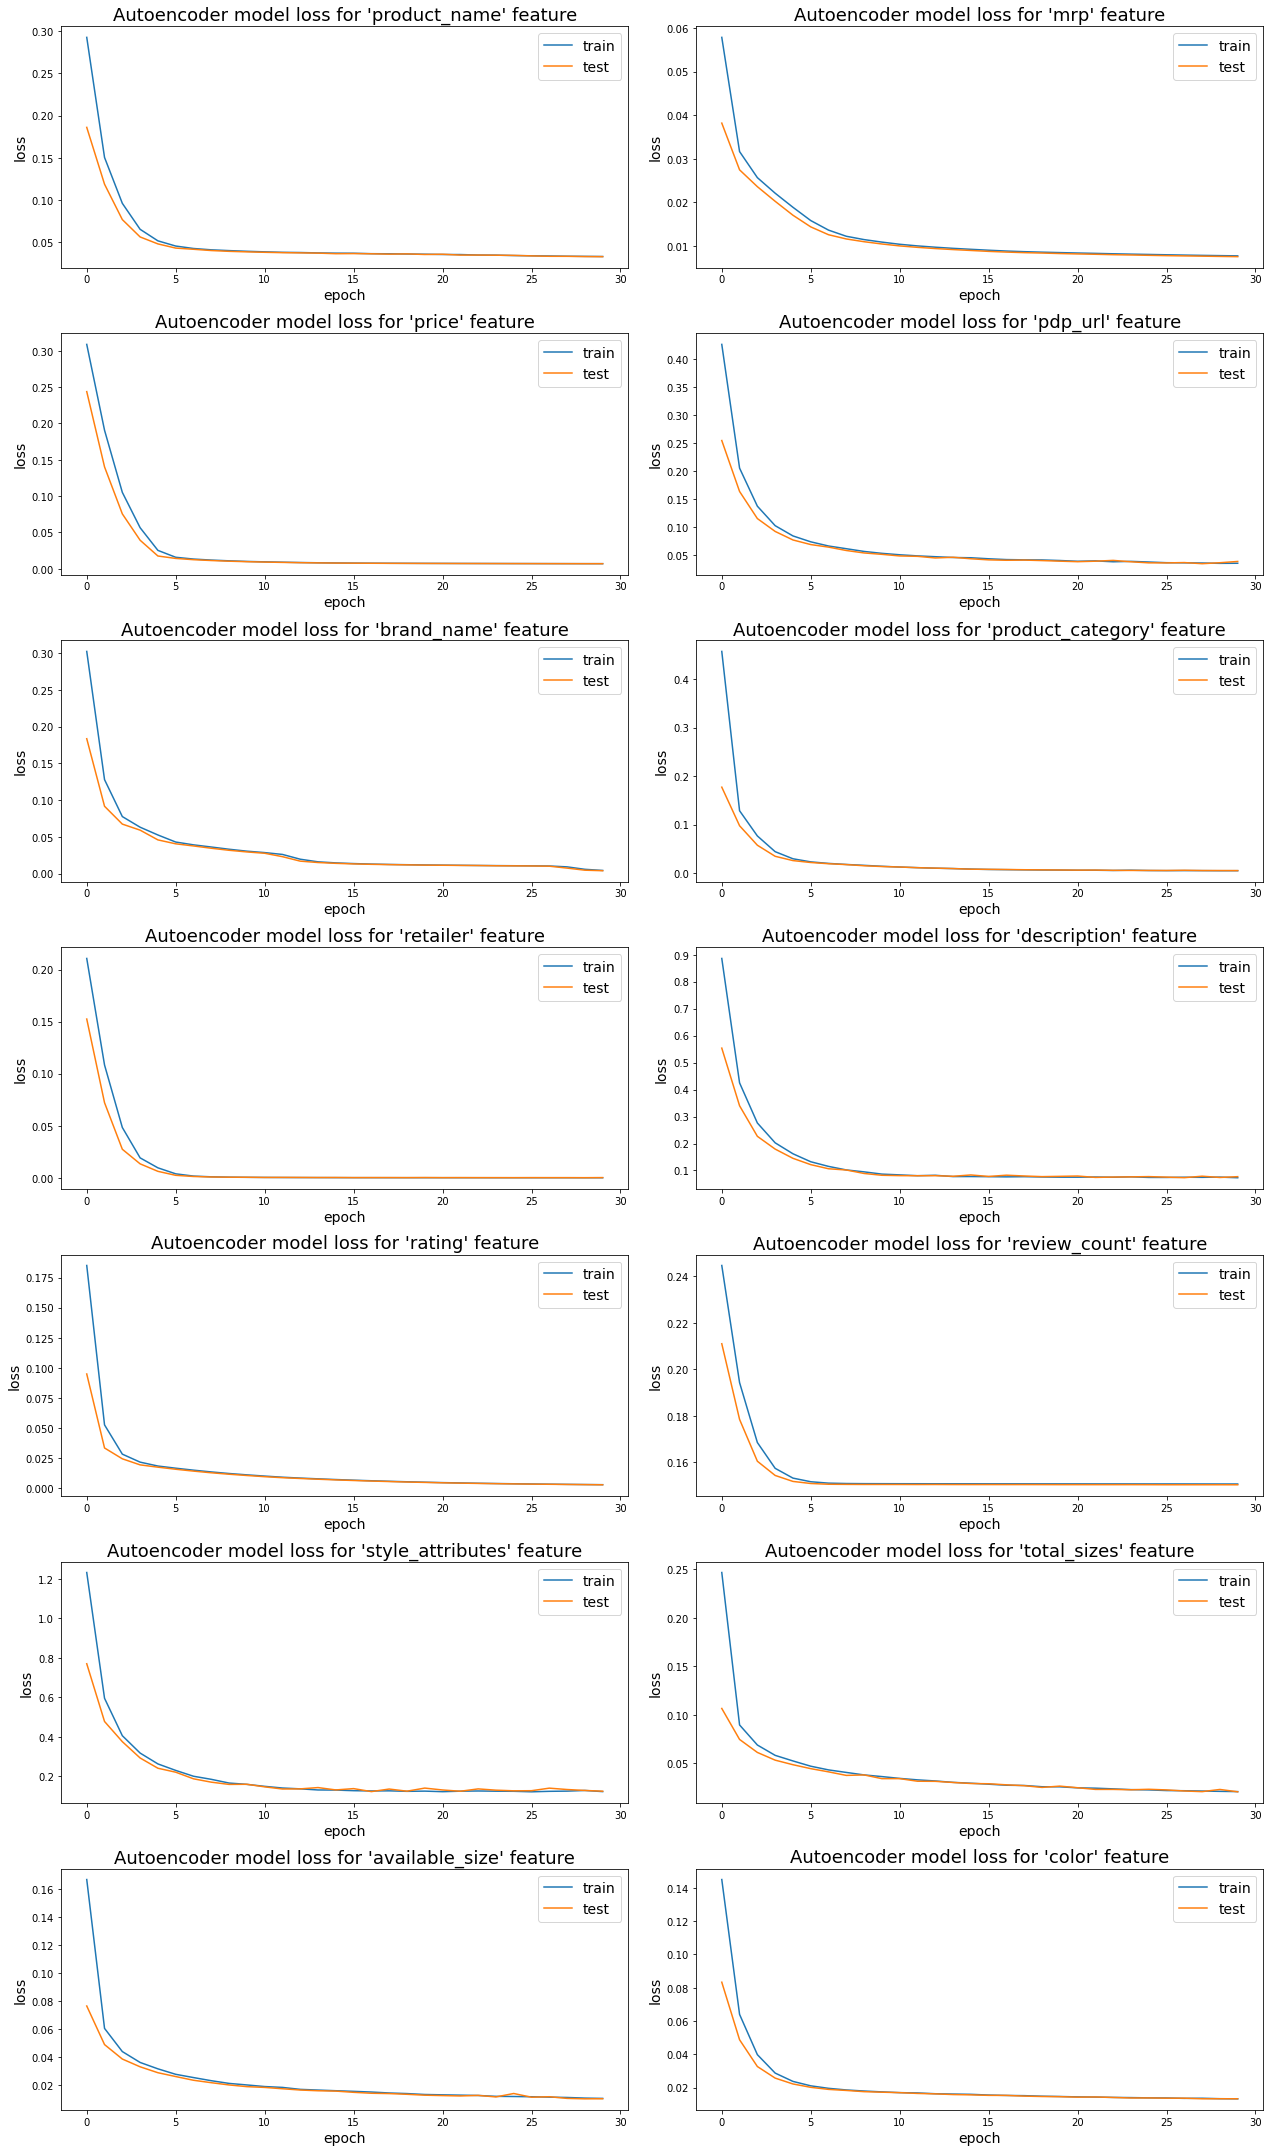

In [23]:
rows_per_column = int(core_cols_count/2)
fig, axs = plt.subplots(rows_per_column, 2)
i = 0
y = 0
index = 0
for column_name in core_cols:
    axs[i, y].plot(fit_histories[index]['loss'])
    #axs[i, y].plot(fit_histories[index]['loss'])
    axs[i, y].plot(fit_histories[index]['val_loss'])
    axs[i, y].set_title("Autoencoder model loss for '{}' feature".format(column_name), fontsize=18)
    axs[i, y].set_ylabel('loss', fontsize=14)
    axs[i, y].set_xlabel('epoch', fontsize=14)
    axs[i, y].legend(['train', 'test'], loc='upper right', fontsize=14);
      
    # Index process
    y = y + 1    
    if y == 2:
        y = 0
        i = i + 1
    
    if i == rows_per_column:
        i = 0
        
    index = index + 1
        
fig.set_size_inches(18, 30)
fig.tight_layout()
plt.savefig(f'./images/autoencoder/{file_name}.pdf', bbox_inches='tight')

#### Evaluate autoencoder for the first column

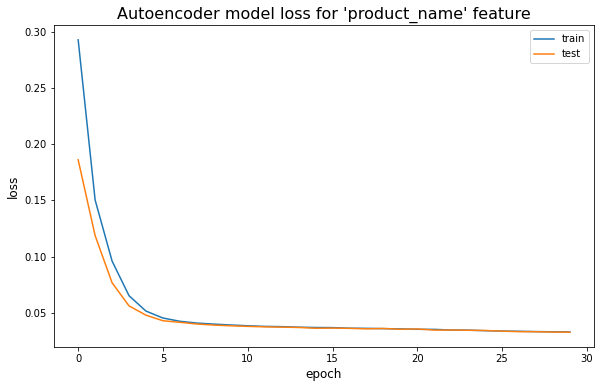

In [24]:
fig, ax = plt.subplots()
colmn_name = core_cols[0]
ax.plot(fit_histories[0]['loss'])
ax.plot(fit_histories[0]['val_loss'])
ax.set_title("Autoencoder model loss for '{}' feature".format(colmn_name), fontsize=16)
ax.set_ylabel('loss', fontsize=12)
ax.set_xlabel('epoch', fontsize=12)
ax.legend(['train', 'test'], loc='upper right', fontsize=10);

fig.tight_layout()
fig.set_size_inches(10, 6)
#plt.show()
plt.savefig(f'./images/autoencoder/experiment-1-autoencoder-macys-loss-{colmn_name}.pdf', bbox_inches='tight')

## Data preparation for processing results

In [25]:
data_quality_mse_df["sum_mse"] = 0
data_quality_mse_df["sum_mse_outlier"] = 0
# Sum outlier and mse
for col in core_cols:
    data_quality_mse_df["sum_mse"] += data_quality_mse_df["{}_mse".format(col)]
    data_quality_mse_df["sum_mse_outlier"] += data_quality_mse_df["is_{}_mse_outlier".format(col)]

In [26]:
print(data_quality_mse_df.shape)
print(data.shape)

(40897, 31)
(40897, 19)


In [27]:
data_quality_mse_df.head()

,product_name_mse,is_product_name_mse_outlier,mrp_mse,is_mrp_mse_outlier,price_mse,is_price_mse_outlier,pdp_url_mse,is_pdp_url_mse_outlier,brand_name_mse,is_brand_name_mse_outlier,product_category_mse,is_product_category_mse_outlier,retailer_mse,is_retailer_mse_outlier,description_mse,is_description_mse_outlier,rating_mse,is_rating_mse_outlier,review_count_mse,is_review_count_mse_outlier,style_attributes_mse,is_style_attributes_mse_outlier,total_sizes_mse,is_total_sizes_mse_outlier,available_size_mse,is_available_size_mse_outlier,color_mse,is_color_mse_outlier,outlier_columns,sum_mse,sum_mse_outlier
0,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.001177,0,,0.292946,0
1,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.015348,0,,0.307117,0
2,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.003124,0,,0.294894,0
3,0.051867,0,0.003978,0,0.001605,0,0.037619,0,0.000408,0,0.000313,0,0.000014,0,0.017175,0,0.000605,0,0.200611,0,0.024415,0,0.003481,0,0.004534,0,0.013561,0,,0.360188,0
4,0.013739,0,0.008947,0,0.005284,0,0.012226,0,0.000465,0,0.000313,0,0.000014,0,0.027172,0,0.000869,0,0.082758,0,0.024380,0,0.000499,0,0.000337,0,0.001177,0,,0.178179,0


In [28]:
data_quality_mse_df = data_quality_mse_df.join(data["synthetic_dq_issue_columns"])

In [29]:
data_quality_mse_df.head()

,product_name_mse,is_product_name_mse_outlier,mrp_mse,is_mrp_mse_outlier,price_mse,is_price_mse_outlier,pdp_url_mse,is_pdp_url_mse_outlier,brand_name_mse,is_brand_name_mse_outlier,product_category_mse,is_product_category_mse_outlier,retailer_mse,is_retailer_mse_outlier,description_mse,is_description_mse_outlier,rating_mse,is_rating_mse_outlier,review_count_mse,is_review_count_mse_outlier,style_attributes_mse,is_style_attributes_mse_outlier,total_sizes_mse,is_total_sizes_mse_outlier,available_size_mse,is_available_size_mse_outlier,color_mse,is_color_mse_outlier,outlier_columns,sum_mse,sum_mse_outlier,synthetic_dq_issue_columns
0,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.001177,0,,0.292946,0,nan
1,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.015348,0,,0.307117,0,nan
2,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.003124,0,,0.294894,0,nan
3,0.051867,0,0.003978,0,0.001605,0,0.037619,0,0.000408,0,0.000313,0,0.000014,0,0.017175,0,0.000605,0,0.200611,0,0.024415,0,0.003481,0,0.004534,0,0.013561,0,,0.360188,0,nan
4,0.013739,0,0.008947,0,0.005284,0,0.012226,0,0.000465,0,0.000313,0,0.000014,0,0.027172,0,0.000869,0,0.082758,0,0.024380,0,0.000499,0,0.000337,0,0.001177,0,,0.178179,0,nan


In [30]:
data = data.join(data_quality_mse_df["sum_mse"])
data = data.join(data_quality_mse_df["sum_mse_outlier"])
data = data.join(data_quality_mse_df["outlier_columns"])

In [31]:
data.head()

,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns,sum_mse,sum_mse_outlier,outlier_columns
0,0,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,nan,nan,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Black,0,0,nan,nan,0.292946,0,
1,1,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,nan,nan,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Simple Grid,0,0,nan,nan,0.307117,0,
2,2,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,nan,nan,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",White,0,0,nan,nan,0.294894,0,
3,3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,nan,nan,"[""Elastic lace waistband"", ""Lace at front and ...","[""M""]","[""M""]",Regal Sensous,0,0,nan,nan,0.360188,0,
4,4,Halo Lace Boyshort 870205,$15.00,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,5.0,2.0,"[""Stretch lace waistband"", ""All-over floral la...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Black,0,0,nan,nan,0.178179,0,


## Save result data

In [32]:
df_mse_threshold_colums = pd.DataFrame(mse_threshold_colums, index=pd.Index([0], name="id")) 
df_mse_threshold_colums.to_csv('./images/autoencoder/experiment-1-mse-threshold-colums-macys.csv')

In [33]:
data_quality_mse_df.to_csv(f'./images/autoencoder/experiment-1-data-quality-mse-df-macys.csv')
data.to_csv(f'./images/autoencoder/experiment-1-data-macys.csv')

## Load result data (JUST FOR LOAD!)

In [3]:
mse_threshold_colums_df = pd.read_csv('./images/autoencoder/experiment-1-mse-threshold-colums-macys.csv')

In [8]:
mse_threshold_colums_df = mse_threshold_colums_df.drop(['id'], axis=1)

In [9]:
mse_threshold_colums_df.head()

,product_name_mse,mrp_mse,price_mse,pdp_url_mse,brand_name_mse,product_category_mse,retailer_mse,description_mse,rating_mse,review_count_mse,style_attributes_mse,total_sizes_mse,available_size_mse,color_mse
0,0.120096,0.254082,0.168239,0.120337,0.092497,0.099666,0.000014,0.095065,0.002348,0.28513,0.092422,0.164758,0.234177,0.081542


In [13]:
mse_threshold_colums = {}
for colum_name in mse_threshold_colums_df:
    mse_threshold_colums[colum_name] = mse_threshold_colums_df[colum_name].values[0]

In [14]:
mse_threshold_colums

{'product_name_mse': 0.12009630328276373,
 'mrp_mse': 0.2540824161432692,
 'price_mse': 0.16823937867889005,
 'pdp_url_mse': 0.1203372835592017,
 'brand_name_mse': 0.092497460299672,
 'product_category_mse': 0.0996663939984402,
 'retailer_mse': 1.3810461375917167e-05,
 'description_mse': 0.09506478450559323,
 'rating_mse': 0.0023483598448512675,
 'review_count_mse': 0.2851300932859529,
 'style_attributes_mse': 0.09242247336677197,
 'total_sizes_mse': 0.16475806242351967,
 'available_size_mse': 0.23417689340983944,
 'color_mse': 0.08154236440463987}

In [15]:
data_quality_mse_df = pd.read_csv(f'./images/autoencoder/experiment-1-data-quality-mse-df-macys.csv')

In [16]:
data_quality_mse_df.head()

,Unnamed: 0,product_name_mse,is_product_name_mse_outlier,mrp_mse,is_mrp_mse_outlier,price_mse,is_price_mse_outlier,pdp_url_mse,is_pdp_url_mse_outlier,brand_name_mse,is_brand_name_mse_outlier,product_category_mse,is_product_category_mse_outlier,retailer_mse,is_retailer_mse_outlier,description_mse,is_description_mse_outlier,rating_mse,is_rating_mse_outlier,review_count_mse,is_review_count_mse_outlier,style_attributes_mse,is_style_attributes_mse_outlier,total_sizes_mse,is_total_sizes_mse_outlier,available_size_mse,is_available_size_mse_outlier,color_mse,is_color_mse_outlier,outlier_columns,sum_mse,sum_mse_outlier,synthetic_dq_issue_columns
0,0,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.001177,0,NaN,0.292946,0,NaN
1,1,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.015348,0,NaN,0.307117,0,NaN
2,2,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.003124,0,NaN,0.294894,0,NaN
3,3,0.051867,0,0.003978,0,0.001605,0,0.037619,0,0.000408,0,0.000313,0,0.000014,0,0.017175,0,0.000605,0,0.200611,0,0.024415,0,0.003481,0,0.004534,0,0.013561,0,NaN,0.360188,0,NaN
4,4,0.013739,0,0.008947,0,0.005284,0,0.012226,0,0.000465,0,0.000313,0,0.000014,0,0.027172,0,0.000869,0,0.082758,0,0.024380,0,0.000499,0,0.000337,0,0.001177,0,NaN,0.178179,0,NaN


In [17]:
data = pd.read_csv(f'./images/autoencoder/experiment-1-data-macys.csv')

In [18]:
data.head()

,Unnamed: 0,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns,sum_mse,sum_mse_outlier,outlier_columns
0,0,0,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Black,0,0,NaN,NaN,0.292946,0,NaN
1,1,1,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",Simple Grid,0,0,NaN,NaN,0.307117,0,NaN
2,2,2,ID String Bikini QF1754,$20.00,$20.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The perfect amount of coverage in a subtle sil...,NaN,NaN,"[""Thin elastic waistband "", ""Repeating logo at...","[""XS"", ""S"", ""M"", ""L"", ""XL""]","[""XS"", ""S"", ""M"", ""L"", ""XL""]",White,0,0,NaN,NaN,0.294894,0,NaN
3,3,3,CK Black Collection Embrace Lace-Waist Thong Q...,$26.00,$26.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Exquisitely designed embroidered lace beautifu...,NaN,NaN,"[""Elastic lace waistband"", ""Lace at front and ...","[""M""]","[""M""]",Regal Sensous,0,0,NaN,NaN,0.360188,0,NaN
4,4,4,Halo Lace Boyshort 870205,$15.00,$15.00,http://www1.macys.com/shop/product/wacoal-halo...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,A fit that is heavenly. The stretch lace Halo ...,5.0,2.0,"[""Stretch lace waistband"", ""All-over floral la...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Black,0,0,NaN,NaN,0.178179,0,NaN


In [19]:
method_threshold = 0.9999

In [40]:
core_cols = data.columns[2:-7].tolist()

In [43]:
core_cols_count = len(core_cols)

In [44]:
print(core_cols_count)

14


## Display of results

### Histogram for the record sum of reconstruction errors

In [21]:
from matplotlib.ticker import PercentFormatter

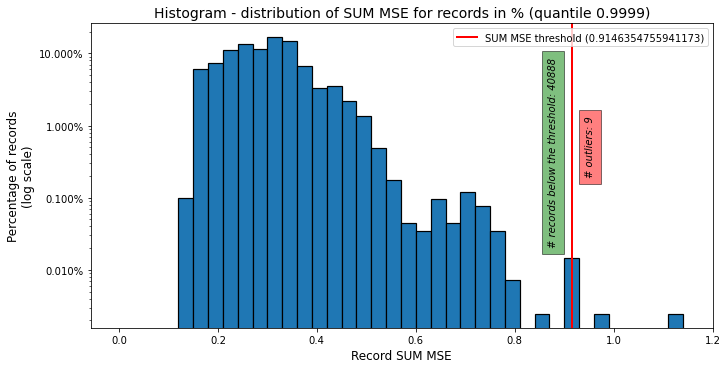

In [37]:
fig, ax = plt.subplots()
file_name = "experiment-1-autoencoder-macys-sum-mse-dist"
sum_mse_data = data_quality_mse_df["sum_mse"]
#sum_mse_data.to_csv(f'./images/autoencoder/{file_name}.csv', index_label='id')
sum_mse_threshold = np.quantile(sum_mse_data, method_threshold)
#bins_set = np.arange(0.0, 1.001, 0.025)
bins_set = np.arange(0.0, max(sum_mse_data) + 0.001, 0.030)
#bins_set = np.arange(min(sum_mse_data), min(max(sum_mse_data)+0.001, 1.001), 0.02)
n, bins, patches = ax.hist(sum_mse_data, bins=bins_set,  weights=np.ones(len(sum_mse_data)) / len(sum_mse_data), edgecolor='black', linewidth=1.2)

sum_mse_outliers = data[data["sum_mse"] > sum_mse_threshold]
sum_mse_outliers_len = len(sum_mse_outliers)

sum_mse_ok = data[data["sum_mse"] <= sum_mse_threshold]
sum_mse_ok_len = len(sum_mse_ok)

ax.axvline(sum_mse_threshold, color='r', linewidth=2)
ax.set_xlabel('Record SUM MSE', fontsize=12)
ax.set_ylabel('Percentage of records\n(log scale)', fontsize=12)
ax.text(0.795, 0.5, f'# outliers: {sum_mse_outliers_len}', style='italic', rotation='vertical',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 6}, transform=ax.transAxes)
ax.text(0.735, 0.27, f'# records below the threshold: {sum_mse_ok_len}', style='italic', rotation='vertical',
        bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 6}, transform=ax.transAxes)
ax.set_title("Histogram - distribution of SUM MSE for records in % (quantile {})".format(method_threshold), fontsize=14)
x_ticks = np.arange(0.0, max(sum_mse_data) + 0.2001, 0.2)
ax.set_xticks(x_ticks)
ax.legend(["SUM MSE threshold ({})".format(sum_mse_threshold)], loc='upper right', fontsize=10);

fig.tight_layout()
fig.set_size_inches(15, 6)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=3))

plt.savefig(f'./images/autoencoder/{file_name}.pdf', bbox_inches='tight')

In [36]:
sum_mse_outliers = data[data["sum_mse"] > sum_mse_threshold]

In [37]:
print(len(sum_mse_outliers))

9


In [97]:
sum_mse_outliers

,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns,sum_mse,sum_mse_outlier,outlier_columns
19386,19386,Intense Power Low-Impact Mesh-Racerback Bralet...,$36.00,$18.90,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Headphones,Macys US,The iconic logo is the perfect finishing touch...,3.5,2.0,"[""Wireless cups"", ""Wide band below bust with l...","[""L""]","[""L""]",Urban Blue,1,1,[product_category][Wrong categorization] Inade...,product_category,1.152998,1,"'product_category',"
27814,27814,Awareness Seamless Full Figure Underwire Bra a...,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-awar...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Get the seamless support you need with our #1 ...,4.6,305.0,"[""Please select specific item for product info...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...",Lavender Frost,0,0,nan,nan,0.980698,1,"'available_size',"
27815,27815,Awareness Seamless Full Figure Underwire Bra a...,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-awar...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Get the seamless support you need with our #1 ...,4.6,305.0,"[""Please select specific item for product info...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...",Lavender Frost,0,0,nan,nan,0.914635,0,
27816,27816,Awareness Seamless Full Figure Underwire Bra a...,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-awar...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Get the seamless support you need with our #1 ...,4.6,305.0,"[""Please select specific item for product info...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...",Lavender Frost,0,0,nan,nan,0.914635,0,
27817,27817,Awareness Seamless Full Figure Underwire Bra a...,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-awar...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Get the seamless support you need with our #1 ...,4.6,305.0,"[""Please select specific item for product info...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...",Lavender Frost,0,0,nan,nan,0.914635,0,
27818,27818,Awareness Seamless Full Figure Underwire Bra a...,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-awar...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Get the seamless support you need with our #1 ...,4.6,305.0,"[""Please select specific item for product info...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...",Lavender Frost,0,0,nan,nan,0.914635,0,
27819,27819,Awareness Seamless Full Figure Underwire Bra a...,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-awar...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Get the seamless support you need with our #1 ...,4.6,305.0,"[""Please select specific item for product info...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...",Lavender Frost,0,0,nan,nan,0.914635,0,
27821,27821,Awareness Seamless Full Figure Underwire Bra a...,$65.00,$34.99,http://www1.macys.com/shop/product/wacoal-awar...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Get the seamless support you need with our #1 ...,4.6,305.0,"[""Please select specific item for product info...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...","[""34C"", ""36C"", ""38C"", ""40DD"", ""32D"", ""32DD"", ""...",Lavender Fro

In [39]:
def print_cols(data, index):
    for col_name in data.columns:     
        print("[{}] - {} - {}".format(col_name, type(data.iloc[index][col_name]), data.iloc[index][col_name]))

In [162]:
print_cols(sum_mse_outliers, 0)

[id] - <class 'str'> - 19386
[product_name] - <class 'str'> - Intense Power Low-Impact Mesh-Racerback Bralette QF1540
[mrp] - <class 'str'> - $36.00 
[price] - <class 'str'> - $18.90 
[pdp_url] - <class 'str'> - http://www1.macys.com/shop/product/calvin-klein-intense-power-low-impact-mesh-racerback-bralette-qf1540?ID=2747953&CategoryID=55799
[brand_name] - <class 'str'> - Calvin Klein
[product_category] - <class 'str'> - Headphones
[retailer] - <class 'str'> - Macys US
[description] - <class 'str'> - The iconic logo is the perfect finishing touch to this comfy bralette from Intense Power by Calvin Klein.
[rating] - <class 'str'> - 3.5
[review_count] - <class 'str'> - 2.0
[style_attributes] - <class 'str'> - ["Wireless cups", "Wide band below bust with logo", "Racerback with sheer mesh panel", "Pull-on style", "Low-impact sports bra ideal for yoga, pilates and lounging", "Nylon/elastane", "Machine washable", "Imported", "Web ID: 2747953"]
[total_sizes] - <class 'str'> - ["L"]
[available

In [105]:
data_quality_mse_df.head()

,product_name_mse,is_product_name_mse_outlier,mrp_mse,is_mrp_mse_outlier,price_mse,is_price_mse_outlier,pdp_url_mse,is_pdp_url_mse_outlier,brand_name_mse,is_brand_name_mse_outlier,product_category_mse,is_product_category_mse_outlier,retailer_mse,is_retailer_mse_outlier,description_mse,is_description_mse_outlier,rating_mse,is_rating_mse_outlier,review_count_mse,is_review_count_mse_outlier,style_attributes_mse,is_style_attributes_mse_outlier,total_sizes_mse,is_total_sizes_mse_outlier,available_size_mse,is_available_size_mse_outlier,color_mse,is_color_mse_outlier,outlier_columns,sum_mse,sum_mse_outlier,synthetic_dq_issue_columns
0,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.001177,0,,0.292946,0,nan
1,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.015348,0,,0.307117,0,nan
2,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.003124,0,,0.294894,0,nan
3,0.051867,0,0.003978,0,0.001605,0,0.037619,0,0.000408,0,0.000313,0,0.000014,0,0.017175,0,0.000605,0,0.200611,0,0.024415,0,0.003481,0,0.004534,0,0.013561,0,,0.360188,0,nan
4,0.013739,0,0.008947,0,0.005284,0,0.012226,0,0.000465,0,0.000313,0,0.000014,0,0.027172,0,0.000869,0,0.082758,0,0.024380,0,0.000499,0,0.000337,0,0.001177,0,,0.178179,0,nan


In [112]:
new_colms = []
for column_name in core_cols:
    new_colms.append(f"{column_name}_mse")

In [113]:
print(new_colms)

['product_name_mse', 'mrp_mse', 'price_mse', 'pdp_url_mse', 'brand_name_mse', 'product_category_mse', 'retailer_mse', 'description_mse', 'rating_mse', 'review_count_mse', 'style_attributes_mse', 'total_sizes_mse', 'available_size_mse', 'color_mse']


In [144]:
record1_id = 19386
record1 = data_quality_mse_df[new_colms].iloc[record1_id]
record2_id = 27814
record2 = data_quality_mse_df[new_colms].iloc[record2_id]

In [164]:
print(record1)
print(record2)

product_name_mse        0.056388
mrp_mse                 0.000469
price_mse               0.011252
pdp_url_mse             0.040342
brand_name_mse          0.000408
product_category_mse    0.884774
retailer_mse            0.000014
description_mse         0.022433
rating_mse              0.000285
review_count_mse        0.082758
style_attributes_mse    0.034322
total_sizes_mse         0.003486
available_size_mse      0.004528
color_mse               0.011539
Name: 19386, dtype: float64
product_name_mse        0.091550
mrp_mse                 0.014207
price_mse               0.004395
pdp_url_mse             0.052779
brand_name_mse          0.000465
product_category_mse    0.000313
retailer_mse            0.000014
description_mse         0.055916
rating_mse              0.000272
review_count_mse        0.278885
style_attributes_mse    0.022085
total_sizes_mse         0.164758
available_size_mse      0.288558
color_mse               0.006501
Name: 27814, dtype: float64


## Compare synthetic and nonsynthetic column MSE

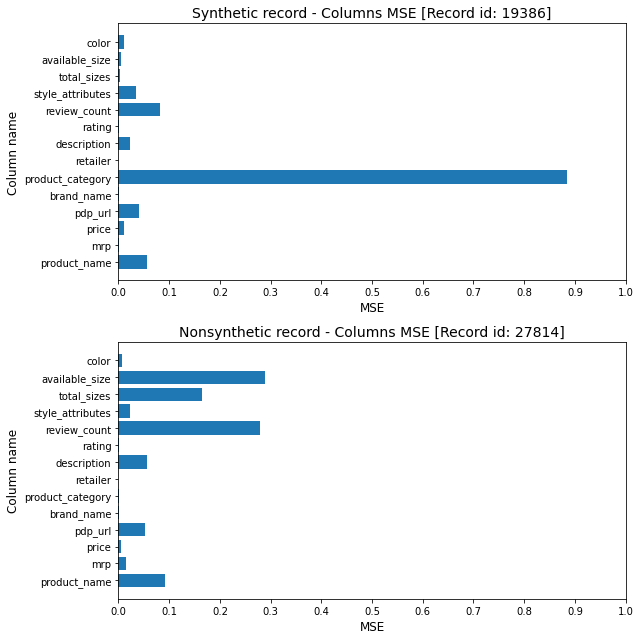

In [237]:
fig, axs = plt.subplots(2, 1)

axs[0].barh(core_cols, record1.values)
axs[0].set_xlabel("MSE", fontsize=12)
axs[0].set_ylabel('Column name', fontsize=12)
rng = np.arange(0.0, 1.1, 0.1)
axs[0].set_xticks(rng)
axs[0].set_title(f'Synthetic record - Columns MSE [Record id: {record1_id}]', fontsize=14);

axs[1].barh(core_cols, record2.values)
axs[1].set_xlabel("MSE", fontsize=12)
axs[1].set_ylabel('Column name', fontsize=12)
rng = np.arange(0.0, 1.1, 0.1)
axs[1].set_xticks(rng)
axs[1].set_title(f'Nonsynthetic record - Columns MSE [Record id: {record2_id}]', fontsize=14);

fig.set_size_inches(9, 9)
fig.tight_layout()

plt.savefig(f'./images/autoencoder/experiment-1-autoencoder-macys-mse-synth-vs-nonsynth-record.pdf', bbox_inches='tight')

In [163]:
print_cols(sum_mse_outliers, 1)

[id] - <class 'str'> - 27814
[product_name] - <class 'str'> - Awareness Seamless Full Figure Underwire Bra and High Cut Brief
[mrp] - <class 'str'> - $65.00 
[price] - <class 'str'> - $34.99 
[pdp_url] - <class 'str'> - http://www1.macys.com/shop/product/wacoal-awareness-seamless-full-figure-underwire-bra-high-cut-brief?ID=1472235&CategoryID=65739
[brand_name] - <class 'str'> - Wacoal
[product_category] - <class 'str'> - Women - Lingerie & Shapewear - Designer Lingerie
[retailer] - <class 'str'> - Macys US
[description] - <class 'str'> - Get the seamless support you need with our #1 best-selling bra! Wacoal's Awareness Full Figure Underwire Bra is great for fuller figures, while the high-cut brief is lightweight, smooth and virtually disappears under your clothes.
[rating] - <class 'str'> - 4.6
[review_count] - <class 'str'> - 305.0
[style_attributes] - <class 'str'> - ["Please select specific item for product information.", "Imported", "Web ID: 1472235"]
[total_sizes] - <class 'str'> 

In [236]:
print_cols(sum_mse_outliers, 7)

[id] - <class 'str'> - 27821
[product_name] - <class 'str'> - Awareness Seamless Full Figure Underwire Bra and High Cut Brief
[mrp] - <class 'str'> - $65.00 
[price] - <class 'str'> - $34.99 
[pdp_url] - <class 'str'> - http://www1.macys.com/shop/product/wacoal-awareness-seamless-full-figure-underwire-bra-high-cut-brief?ID=1472235&CategoryID=65739
[brand_name] - <class 'str'> - Wacoal
[product_category] - <class 'str'> - Women - Lingerie & Shapewear - Designer Lingerie
[retailer] - <class 'str'> - Macys US
[description] - <class 'str'> - Get the seamless support you need with our #1 best-selling bra! Wacoal's Awareness Full Figure Underwire Bra is great for fuller figures, while the high-cut brief is lightweight, smooth and virtually disappears under your clothes.
[rating] - <class 'str'> - 4.6
[review_count] - <class 'str'> - 305.0
[style_attributes] - <class 'str'> - ["Please select specific item for product information.", "Imported", "Web ID: 1472235"]
[total_sizes] - <class 'str'> 

In [191]:
import re

In [197]:
text = '''["34C", "36C", "38C", "40DD", "32D", "32DD", "32DDD", "34C", "S", "M", "L", "XL"]'''
pattern = r'"([A-Za-z0-9_\./\\-]*)"'
m = re.findall(pattern, text)
print(m)
# len(re.findall(str(x))) - len(set(re.findall(str(x)))))

['34C', '36C', '38C', '40DD', '32D', '32DD', '32DDD', '34C', 'S', 'M', 'L', 'XL']


In [204]:
df_as_mean = (data['available_size'].apply(lambda x: (len(re.findall(pattern, x)) - len(set(re.findall(pattern, x))))).reset_index(name='len_text'))

In [210]:
df_as_mean[df_as_mean['len_text'] > 0].head()

,index,len_text
27767,27767,7
27768,27768,7
27769,27769,7
27770,27770,8
27771,27771,10


In [206]:
print(min(df_as_mean["len_text"]))
print(np.mean(df_as_mean["len_text"]))
print(max(df_as_mean["len_text"]))
print(len(data["available_size"].iloc[record2_id]))

0
0.004792527569259359
10
81


In [238]:
test = data[data["review_count"] != "nan"]
test.head()

10


In [ ]:
test2 = data[data["review_count"] == "305.0"]
print(len(test2))

In [228]:
print(min(test["review_count"].astype(float)))
print(max(test["review_count"].astype(float)))

1.0
406.0


In [101]:
interesting_style_attributes = data[data['style_attributes'].str.contains("Please select specific item for product information.")]

In [102]:
len(interesting_style_attributes)

48

In [103]:
interesting_style_attributes.head()

,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns,sum_mse,sum_mse_outlier,outlier_columns
27689,27689,Embrace Lace Push Up Bra and Bikini,$27.00,$27.00,http://www1.macys.com/shop/product/wacoal-embr...,Wacoal,Women - Lingerie & Shapewear - Lingerie Sets,Macys US,Such intricate detail! The delicate lace on Wa...,nan,37.0,"[""Please select specific item for product info...","[""S"", ""M"", ""L"", ""XL"", """"]","[""S"", ""M"", ""L"", ""XL"", """"]",Black,0,0,nan,nan,0.391832,0,
27690,27690,Embrace Lace Push Up Bra and Bikini,$27.00,$27.00,http://www1.macys.com/shop/product/wacoal-embr...,Wacoal,Women - Lingerie & Shapewear - Lingerie Sets,Macys US,Such intricate detail! The delicate lace on Wa...,nan,37.0,"[""Please select specific item for product info...","[""S"", ""M"", ""L"", ""XL"", """"]","[""S"", ""M"", ""L"", ""XL"", """"]",Nude/Ivory,0,0,nan,nan,0.400541,0,
27691,27691,Embrace Lace Push Up Bra and Bikini,$27.00,$27.00,http://www1.macys.com/shop/product/wacoal-embr...,Wacoal,Women - Lingerie & Shapewear - Lingerie Sets,Macys US,Such intricate detail! The delicate lace on Wa...,nan,37.0,"[""Please select specific item for product info...","[""S"", ""M"", ""L"", ""XL"", """"]","[""S"", ""M"", ""L"", ""XL"", """"]",Delicious White,0,0,nan,nan,0.406693,0,
27767,27767,"b.sultry Balconette Bra, Thong and Garter Belt",$44.00,$23.10,http://www1.macys.com/shop/product/b.temptd-by...,b.tempt'd by Wacoal,Women - Lingerie & Shapewear - Lingerie Sets,Macys US,Gorgeous chantilly lace adds appeal to b.tempt...,nan,7.0,"[""Please select specific item for product info...","[""32B"", ""32C"", ""32D"", ""32DD"", ""34B"", ""34C"", ""3...","[""32B"", ""32C"", ""32D"", ""32DD"", ""34B"", ""34C"", ""3...",Tango Red/Vanilla Ice,0,0,nan,nan,0.595729,0,
27768,27768,"b.sultry Balconette Bra, Thong and Garter Belt",$44.00,$23.10,http://www1.macys.com/shop/product/b.temptd-by...,b.tempt'd by Wacoal,Women - Lingerie & Shapewear - Lingerie Sets,Macys US,Gorgeous chantilly lace adds appeal to b.tempt...,nan,7.0,"[""Please select specific item for product info...","[""32B"", ""32C"", ""32D"", ""32DD"", ""34B"", ""34C"", ""3...","[""32B"", ""32C"", ""32D"", ""32DD"", ""34B"", ""34C"", ""3...",Tango Red/Vanilla Ice,0,0,nan,nan,0.595729,0,


In [100]:
print_cols(interesting_style_attributes, 1)

[id] - <class 'str'> - 27690
[product_name] - <class 'str'> - Embrace Lace Push Up Bra and Bikini
[mrp] - <class 'str'> - $27.00 
[price] - <class 'str'> - $27.00 
[pdp_url] - <class 'str'> - http://www1.macys.com/shop/product/wacoal-embrace-lace-push-up-bra-bikini?ID=1106955&CategoryID=55804
[brand_name] - <class 'str'> - Wacoal
[product_category] - <class 'str'> - Women - Lingerie & Shapewear - Lingerie Sets
[retailer] - <class 'str'> - Macys US
[description] - <class 'str'> - Such intricate detail! The delicate lace on Wacoal's Embrace Lace Push Up Bra and Bikini complements the colors so nicely.
[rating] - <class 'str'> - nan
[review_count] - <class 'str'> - 37.0
[style_attributes] - <class 'str'> - ["Please select specific item for product information. ", "Imported", "Web ID: 1106955"]
[total_sizes] - <class 'str'> - ["S", "M", "L", "XL", ""]
[available_size] - <class 'str'> - ["S", "M", "L", "XL", ""]
[color] - <class 'str'> - Nude/Ivory
[has_synthetic_dq_issue] - <class 'str'> -

### Histogram for the column reconstruction errors

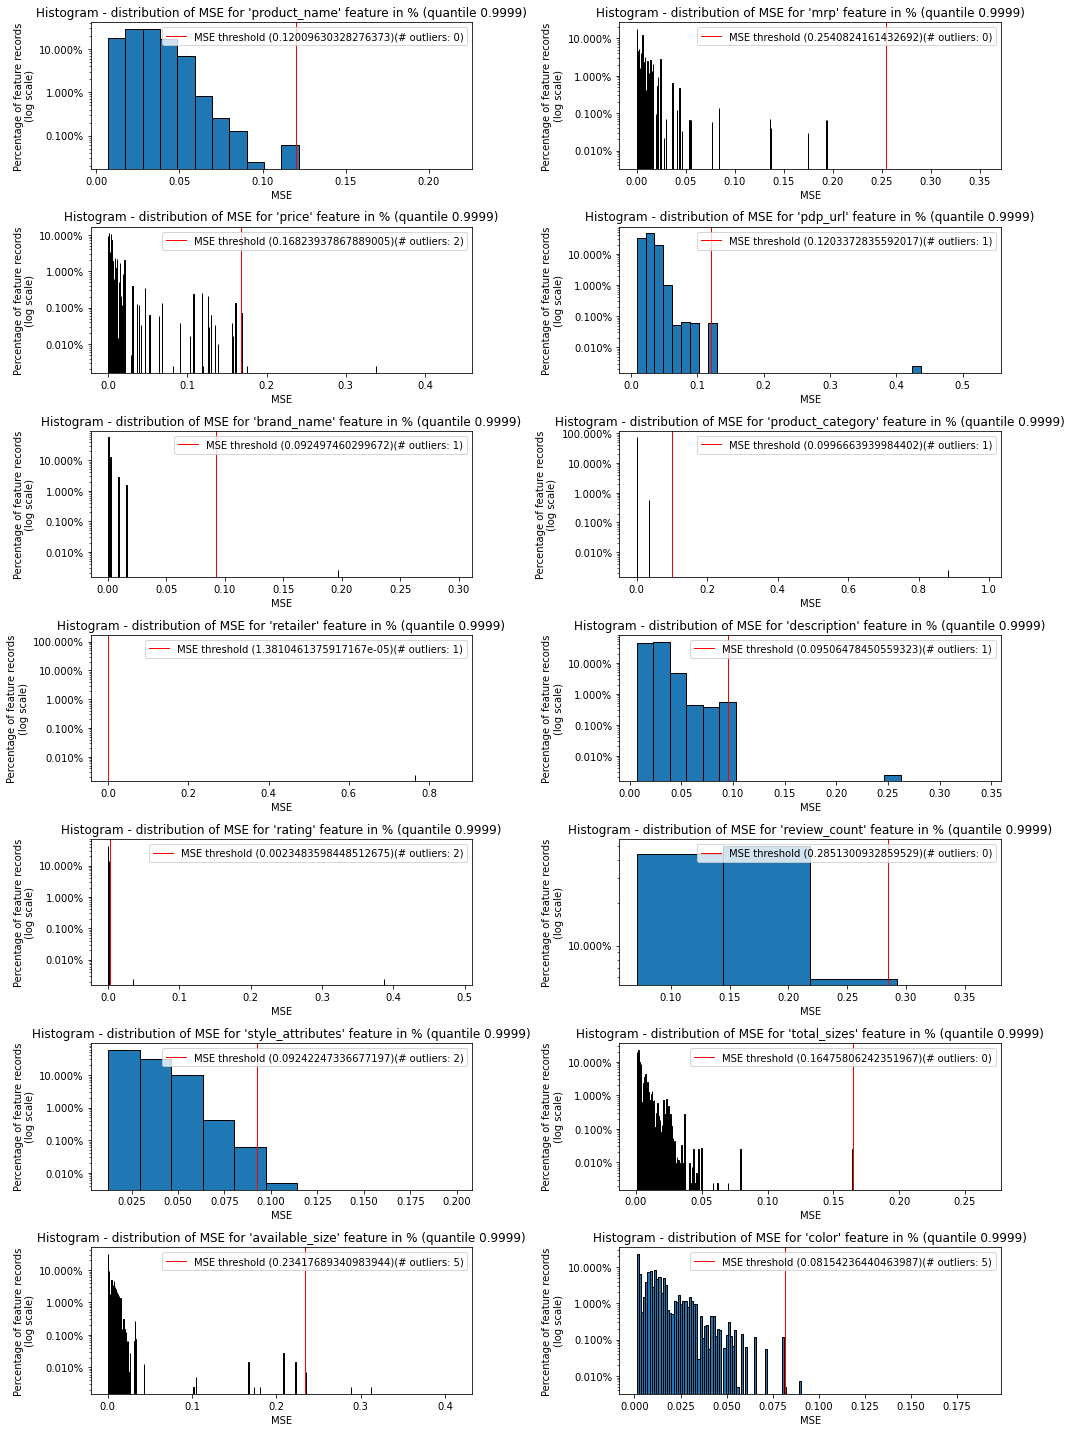

In [45]:
rows_per_column = int(core_cols_count/2)
fig, axs = plt.subplots(rows_per_column, 2)
i = 0
y = 0
index = 0
for column_name in core_cols:
    mse_column_name = "{}_mse".format(column_name)
    is_mse_column_name = "is_{}_mse_outlier".format(column_name)
    mse_data = data_quality_mse_df[mse_column_name]
    column_mse_threshold = mse_threshold_colums[mse_column_name]
    #clm_mse_outliers = data_quality_mse_df[data_quality_mse_df[mse_column_name] > column_mse_threshold]
    clm_mse_outliers_len = sum(data_quality_mse_df[is_mse_column_name].tolist())
    step = np.quantile(mse_data, 0.05)
    bins_set = np.arange(min(mse_data), max(mse_data)+0.1, step)
    axs[i, y].hist(mse_data, bins=bins_set, weights=np.ones(len(mse_data)) / len(mse_data), edgecolor='black', linewidth=1)
    axs[i, y].axvline(column_mse_threshold, color='r', linewidth=1)
    axs[i, y].set_xlabel('MSE', fontsize=10)
    #axs[i, y].set_xscale('log')
    axs[i, y].set_ylabel('Percentage of feature records\n(log scale)', fontsize=10)
    axs[i, y].set_title("Histogram - distribution of MSE for '{}' feature in % (quantile {})".format(column_name, method_threshold), fontsize=12)
    axs[i, y].set_yscale('log')
    axs[i, y].yaxis.set_major_formatter(PercentFormatter(1, decimals=3))
    #axs[i, y].margins(0)
    axs[i, y].legend(["MSE threshold ({})(# outliers: {})".format(column_mse_threshold, clm_mse_outliers_len)], loc='upper right', fontsize=10);

      
    # Index process
    y = y + 1    
    if y == 2:
        y = 0
        i = i + 1
    
    if i == rows_per_column:
        i = 0
        
    index = index + 1
        
fig.set_size_inches(15, 20)
fig.tight_layout()
plt.savefig(f'./images/autoencoder/experiment-1-autoencoder-macys-mse-dist-columns.pdf', bbox_inches='tight')

### Evaluate DQ measurement performance

In [43]:
data_quality_mse_df.head()

,product_name_mse,is_product_name_mse_outlier,mrp_mse,is_mrp_mse_outlier,price_mse,is_price_mse_outlier,pdp_url_mse,is_pdp_url_mse_outlier,brand_name_mse,is_brand_name_mse_outlier,product_category_mse,is_product_category_mse_outlier,retailer_mse,is_retailer_mse_outlier,description_mse,is_description_mse_outlier,rating_mse,is_rating_mse_outlier,review_count_mse,is_review_count_mse_outlier,style_attributes_mse,is_style_attributes_mse_outlier,total_sizes_mse,is_total_sizes_mse_outlier,available_size_mse,is_available_size_mse_outlier,color_mse,is_color_mse_outlier,outlier_columns,sum_mse,sum_mse_outlier,synthetic_dq_issue_columns
0,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.001177,0,,0.292946,0,nan
1,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.015348,0,,0.307117,0,nan
2,0.023715,0,0.000558,0,0.000216,0,0.017146,0,0.000408,0,0.000313,0,0.000014,0,0.023128,0,0.000605,0,0.200611,0,0.022640,0,0.001636,0,0.000780,0,0.003124,0,,0.294894,0,nan
3,0.051867,0,0.003978,0,0.001605,0,0.037619,0,0.000408,0,0.000313,0,0.000014,0,0.017175,0,0.000605,0,0.200611,0,0.024415,0,0.003481,0,0.004534,0,0.013561,0,,0.360188,0,nan
4,0.013739,0,0.008947,0,0.005284,0,0.012226,0,0.000465,0,0.000313,0,0.000014,0,0.027172,0,0.000869,0,0.082758,0,0.024380,0,0.000499,0,0.000337,0,0.001177,0,,0.178179,0,nan


In [44]:
data[data["has_synthetic_dq_issue"] == '1'].head()

,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns,sum_mse,sum_mse_outlier,outlier_columns
50,50,Modern Logo Pants D1632,$46.00,£16.50,http://www1.macys.com/shop/product/calvin-klei...,Coca-Cola,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,"Comfy and low-key, these Modern pants from Cal...",5.0,1.0,"[""Wide elastic waistband features logo"", ""Full...","[""S"", ""M"", ""L""]","[""S"", ""M"", ""L""]",Black,1,2,[brand_name][Wrong information] Product name t...,brand_name; price,0.543697,2,"'price','brand_name',"
129,129,CK One Logo Thong QF1368,$20.00,$16,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Calvin Klein's sleek thong is a classic look t...,nan,nan,"[""Elastic waistband "", ""Contrast at waist with...","[""S"", ""M"", ""L""]","[""S"", ""M"", ""L""]",Desert Sunset,1,1,[price][Wrong format] Missing floating point.,price,0.651668,1,"'price',"
928,928,Stark Beauty Rose-Lace Contour Bra 853225,$68.00,$68.00,http://www1.macys.com/shop/product/wacoal-star...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,"Deutsches Ipsum Dolor sit amet, Weltschmerz ad...",nan,nan,"[""Split straps adjust at back"", ""Underwire, co...","{""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""32DDD"", ...","[""30D"", ""30DD"", ""30DDD"", ""32C"", ""32D"", ""32DD"",...",Black,1,2,[description][Wrong language] The description ...,description; total_sizes,0.623713,1,"'description',"
1291,1291,b.provocative Contrast-Lace Bra 951222,$40.00,$0.0,http://www1.macys.com/shop/product/b.temptd-by...,b.tempt'd by Wacoal,Women - Lingerie & Shapewear - Bras,Macys US,Flattering sheer nude panels are decorated wit...,nan,nan,"[""Adjustable straps"", ""Delicate elastic at nec...","[""32C"", ""32D"", ""34B"", ""34C"", ""34D"", ""36B"", ""36C""]","[""32C"", ""32D"", ""34B"", ""34C"", ""34D"", ""36B"", ""36C""]",Marine,1,1,[price][Suspicious value] Misleading price.,price,0.484270,0,
3386,3386,Skinsense High-Cut Seamless Brief 871254,$18.00,$18.00,http://www1.macys.com/shop/product/wacoal-skin...,Wacoal,Women - Lingerie & Shapewear - Panties,Macys US,I do not have time to create a description.,5.0,2.0,"[""High cut"", ""Heat seal at leg for a clean fin...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Conch Shell,1,1,[description][Incomplete information] Insuffic...,description,0.254760,0,


In [45]:
below_mse_treshold_nonsynthetic_list = []
below_mse_treshold_synthetic_list = []
above_mse_treshold_nonsynthetic_list = [] 
above_mse_treshold_synthetic_list = []
synthetic_issues_count_list = []
unique_values_count_list = []

for column in core_cols:
    below_mse_treshold_nonsynthetic_list.append(len(data_quality_mse_df[(data_quality_mse_df["is_{}_mse_outlier".format(column)] == 0) & (data_quality_mse_df["synthetic_dq_issue_columns"].str.contains(column) == False)]))
    below_mse_treshold_synthetic_list.append(len(data_quality_mse_df[(data_quality_mse_df["is_{}_mse_outlier".format(column)] == 0) & (data_quality_mse_df["synthetic_dq_issue_columns"].str.contains(column) == True)]))
    above_mse_treshold_nonsynthetic_list.append(len(data_quality_mse_df[(data_quality_mse_df["is_{}_mse_outlier".format(column)] == 1) & (data_quality_mse_df["synthetic_dq_issue_columns"].str.contains(column) == False)]))
    above_mse_treshold_synthetic_list.append(len(data_quality_mse_df[(data_quality_mse_df["is_{}_mse_outlier".format(column)] == 1) & (data_quality_mse_df["synthetic_dq_issue_columns"].str.contains(column) == True)]))
    synthetic_issues_count_list.append(len(data_quality_mse_df[(data_quality_mse_df["synthetic_dq_issue_columns"].str.contains(column) == True)]))
    unique_values_count_list.append(len(set(data[column])))

In [46]:
print(below_mse_treshold_nonsynthetic_list)
print(below_mse_treshold_synthetic_list)
print(above_mse_treshold_nonsynthetic_list)
print(above_mse_treshold_synthetic_list)
print(synthetic_issues_count_list)
print(unique_values_count_list)

[40897, 40897, 40892, 40896, 40896, 40896, 40896, 40894, 40895, 40897, 40895, 40896, 40892, 40891]
[0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 5]
[0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0]
[0, 0, 5, 1, 1, 1, 1, 3, 2, 0, 0, 1, 0, 1]
[586, 78, 177, 1242, 9, 7, 2, 591, 28, 114, 854, 464, 612, 491]


In [47]:
sum_below_mse_treshold_nonsynthetic_list = sum(below_mse_treshold_nonsynthetic_list)
sum_below_mse_treshold_synthetic_list = sum(below_mse_treshold_synthetic_list)
sum_above_mse_treshold_nonsynthetic_list = sum(above_mse_treshold_nonsynthetic_list)
sum_above_mse_treshold_synthetic_list = sum(above_mse_treshold_synthetic_list)
sum_synthetic_issues_count_list = sum(synthetic_issues_count_list)
sum_unique_values_count_list = sum(unique_values_count_list)

print(sum_below_mse_treshold_nonsynthetic_list)
print(sum_below_mse_treshold_synthetic_list)
print(sum_above_mse_treshold_nonsynthetic_list)
print(sum_above_mse_treshold_synthetic_list)
print(sum_synthetic_issues_count_list)
print(sum_unique_values_count_list)

572530
7
12
9
16
5255


In [48]:
sum_nonsynthetic_records = sum_below_mse_treshold_nonsynthetic_list + sum_above_mse_treshold_nonsynthetic_list
perc_nonsynthetic_issues = (100 / sum_nonsynthetic_records) * sum_above_mse_treshold_nonsynthetic_list
print("Percentage of non-synthetic errors: {}%".format(perc_nonsynthetic_issues))

Percentage of non-synthetic errors: 0.002095916107464605%


In [49]:
# Test: Correctness of data categorization
sum_test_list = [sum(x) for x in zip(below_mse_treshold_nonsynthetic_list, below_mse_treshold_synthetic_list, above_mse_treshold_nonsynthetic_list, above_mse_treshold_synthetic_list)]
right_size = len(data_quality_mse_df)

for test in sum_test_list:
    if right_size != test:
        print("Error!")
    else:
        print("[OK] {} - {}".format(right_size, test))

[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897
[OK] 40897 - 40897


In [50]:
df = pd.DataFrame({'[non-synthetic] # records below MSE treshold':below_mse_treshold_nonsynthetic_list, '[synthetic] # records below MSE treshold':below_mse_treshold_synthetic_list, '[non-synthetic] # records above MSE treshold':above_mse_treshold_nonsynthetic_list, '[synthetic] # records above MSE treshold':above_mse_treshold_synthetic_list, '# synthetic DQ issues':synthetic_issues_count_list, '# unique values':unique_values_count_list}, index=core_cols)
display(df)

,[non-synthetic] # records below MSE treshold,[synthetic] # records below MSE treshold,[non-synthetic] # records above MSE treshold,[synthetic] # records above MSE treshold,# synthetic DQ issues,# unique values
product_name,40897,0,0,0,0,586
mrp,40897,0,0,0,0,78
price,40892,3,0,2,5,177
pdp_url,40896,0,0,1,1,1242
brand_name,40896,0,0,1,1,9
product_category,40896,0,0,1,1,7
retailer,40896,0,0,1,1,2
description,40894,2,0,1,3,591
rating,40895,0,0,2,2,28
review_count,40897,0,0,0,0,114


In [51]:
df.to_latex('./latex/autoencoder/experiment-1-autoencoder-macys_mse_summary_results.tex')

In [96]:
df.to_csv('./latex/autoencoder/experiment-1-autoencoder-macys_mse_summary_results.csv', index_label="column name")

## Evaluate success of the autoencoder model on synthetic errors

In [52]:
synthetic_issues_count = sum(synthetic_issues_count_list)
above_mse_treshold_synthetic_count = sum(above_mse_treshold_synthetic_list)
success = (100/synthetic_issues_count)*above_mse_treshold_synthetic_count
print("Success of the model in synthetic errors: {}%".format(success))

Success of the model in synthetic errors: 56.25%


## Examining the results

In [53]:
data[data["has_synthetic_dq_issue"] == '1']

,id,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color,has_synthetic_dq_issue,synthetic_dq_issues_count,synthetic_dq_issues,synthetic_dq_issue_columns,sum_mse,sum_mse_outlier,outlier_columns
50,50,Modern Logo Pants D1632,$46.00,£16.50,http://www1.macys.com/shop/product/calvin-klei...,Coca-Cola,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,"Comfy and low-key, these Modern pants from Cal...",5.0,1.0,"[""Wide elastic waistband features logo"", ""Full...","[""S"", ""M"", ""L""]","[""S"", ""M"", ""L""]",Black,1,2,[brand_name][Wrong information] Product name t...,brand_name; price,0.543697,2,"'price','brand_name',"
129,129,CK One Logo Thong QF1368,$20.00,$16,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Calvin Klein's sleek thong is a classic look t...,nan,nan,"[""Elastic waistband "", ""Contrast at waist with...","[""S"", ""M"", ""L""]","[""S"", ""M"", ""L""]",Desert Sunset,1,1,[price][Wrong format] Missing floating point.,price,0.651668,1,"'price',"
928,928,Stark Beauty Rose-Lace Contour Bra 853225,$68.00,$68.00,http://www1.macys.com/shop/product/wacoal-star...,Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,"Deutsches Ipsum Dolor sit amet, Weltschmerz ad...",nan,nan,"[""Split straps adjust at back"", ""Underwire, co...","{""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""32DDD"", ...","[""30D"", ""30DD"", ""30DDD"", ""32C"", ""32D"", ""32DD"",...",Black,1,2,[description][Wrong language] The description ...,description; total_sizes,0.623713,1,"'description',"
1291,1291,b.provocative Contrast-Lace Bra 951222,$40.00,$0.0,http://www1.macys.com/shop/product/b.temptd-by...,b.tempt'd by Wacoal,Women - Lingerie & Shapewear - Bras,Macys US,Flattering sheer nude panels are decorated wit...,nan,nan,"[""Adjustable straps"", ""Delicate elastic at nec...","[""32C"", ""32D"", ""34B"", ""34C"", ""34D"", ""36B"", ""36C""]","[""32C"", ""32D"", ""34B"", ""34C"", ""34D"", ""36B"", ""36C""]",Marine,1,1,[price][Suspicious value] Misleading price.,price,0.484270,0,
3386,3386,Skinsense High-Cut Seamless Brief 871254,$18.00,$18.00,http://www1.macys.com/shop/product/wacoal-skin...,Wacoal,Women - Lingerie & Shapewear - Panties,Macys US,I do not have time to create a description.,5.0,2.0,"[""High cut"", ""Heat seal at leg for a clean fin...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M"", ""L"", ""XL""]",Conch Shell,1,1,[description][Incomplete information] Insuffic...,description,0.254760,0,
4127,4127,Low-Impact Logo Longline Bralette QF1567,$36.00,$20.25,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Bras,Macys US,A contrast logo is a chic touch to this comfor...,6.0,6.0,"[""Adjustable, multiway straps"", ""Unlined cups""...","[""XS"", ""S"", ""M"", ""L""]","[""XS"", ""M"", ""L""]",Grey Heather/Black Logo,1,1,[rating][OutOfRange] Rating value is out of ra...,rating,0.269713,1,"'rating',"
13386,13386,ID Mesh Logo Thong QF1368,$22.00,$22.00,http://www1.macys.com/shop/product/calvin-klei...,Calvin Klein,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,The sporty style of Calvin Klein's logo thong ...,nan,nan,"[""Colorblocked elastic waistband with logo at ...","[""S"", ""M"", ""L""]","[""S"", ""M"", ""L""]",blakc,1,1,[color][Typo] Wrong color name.,color,0.310299,0,
14121,14121,Lace Kiss Thong 3-Pack 976282,$33.00,$33.00,http://www1.macys.com/shop/product/b.temptd-by...,b.tempt'd by Wacoal,Women - Lingerie & Shapewear - Designer Lingerie,Macys US,Tap into your softer side with this 3-pack of ...,9.0,nan,"[""Lace waistband"", ""Comes in a pack of 3"", ""Li...","[""S"", ""M"", ""L"", ""XL""]","[""S"", ""M""]",Peacoat/Cherry Tomato/Lime,1,1,[rating][OutOfRange] Rating value is out of ra...,rating,0.730193,1,"'rating',"
17141,17141,Visual Effects Minimizer Bra 857210,$65.00,$65.00,http://www1.macys.com/shop/pr

In [54]:
for column in core_cols:
    available_size_issues = data[data["outlier_columns"].str.contains(column) == True]  
    if len(available_size_issues) > 0:
        print("---- '{}' ----".format(column))
        print(*available_size_issues[column].tolist(), sep='\n')

---- 'price' ----
£16.50
$16
---- 'pdp_url' ----
http://www1.macys.uk/shop/product/wacoal-retro-chic-wireless-bra-852186?ID=2692399&amp;CategoryID=65739
---- 'brand_name' ----
Coca-Cola
---- 'product_category' ----
Headphones
---- 'retailer' ----
Kaufland US
---- 'description' ----
Deutsches Ipsum Dolor sit amet, Weltschmerz adipiscing elit, sed do eiusmod Flughafen incididunt ut labore et dolore Die unendliche Geschichte aliqua. Ut enim ad minim Käsefondue quis nostrud exercitation ullamco laboris Brezel ut aliquip ex ea commodo Currywurst Duis aute irure dolor in Müller Rice in voluptate velit esse cillum Deutschland eu fugiat nulla pariatur. Excepteur Vorsprung durch Technik occaecat cupidatat non proident, sunt Doppelscheren-Hubtischwagen culpa qui officia deserunt mollit Reinheitsgebot id est laborum
---- 'rating' ----
6.0
9.0
---- 'style_attributes' ----
["Adjustable straps with double straps at the front", "Wireless, sheer lace cups with contrast lining", "Scalloped trim at the 